In [6]:
# Import libraries

import timeit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage as nd
import cv2


In [ ]:
start_time = timeit.default_timer()

In [7]:
# Define circle finding function

def where_is_circle(x0, y0, r):
    """find a circle in image
    :params x0 = x_coord of center
            y0 = y_coord of center
            r = radius"""
    x_range = np.ones(img.shape)
    y_range = np.ones(img.shape)
    
    x_range = x_range * np.arange(0, img.shape[1])
    
    y_dummy = np.arange(0, img.shape[0]).T
    y_range = np.ones(img.shape) * y_dummy[:, np.newaxis]
    
    where_circle = ((x_range - x0)**2 + (y_range - y0)**2) < r**2
    where_circle = where_circle.astype(int)
    
    return where_circle

In [8]:
img = cv2.imread('bacterial_colonies.jpg',0) #read image as RGB

#plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')

cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR) # read image as gray scale
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1.5,100,param1=300,param2=100,minRadius=100,maxRadius=200) #find circles


In [22]:
circles = np.uint16(np.around(circles)) 
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)


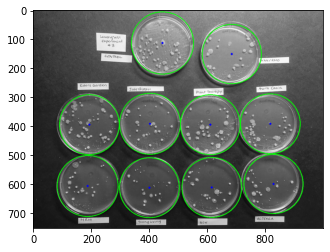

In [23]:
plt.imshow(cimg)

In [24]:
masks = np.zeros(img.shape) # initialize masks to zero

for i, circle in enumerate(circles[0]): # for every circle coordinate, make a mask
    
    x0, y0, r = circle[0], circle[1], circle[2] # find middle coordinates and radius of each circle
    circle_mask = where_is_circle(x0, y0, r)
    masks = masks + circle_mask
    
    plate = circle_mask * img
    plate_cropped = plate[y0-r:y0+r, x0-r:x0+r]
    
    plt.imsave('Plate'+str(i)+'.png',plate_cropped) # save each plate image, cropped to include minimal background


Code run in 433.18 seconds


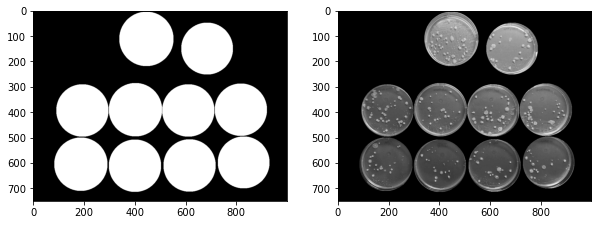

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].imshow(masks, cmap='gray')
axes[1].imshow(masks*img, cmap='gray')

elapsed = timeit.default_timer() - start_time
print("Code run in", "%.2f" % elapsed,"seconds")

Bacterial area in Plate 0 =  29.816326530612248
Bacterial area in Plate 1 =  48.656800829484396
Bacterial area in Plate 2 =  6.211707041191442
Bacterial area in Plate 3 =  47.13832199546486
Bacterial area in Plate 4 =  0.524063236963927
Bacterial area in Plate 5 =  10.465171081157507
Bacterial area in Plate 6 =  32.87303233103968
Bacterial area in Plate 7 =  52.064109957708574
Bacterial area in Plate 8 =  51.42096333301913
Bacterial area in Plate 9 =  0.33640907343329485


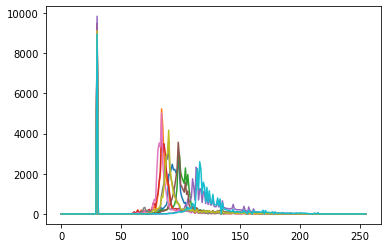

In [34]:
for i in range(0,10,1):
    img = cv2.imread('Plate'+ str(i) + '.png',0)
    hist,bins = np.histogram(img.ravel(),256,[0,256])
    plt.plot(hist)
    len_bins= len(bins)-1
    #here is the totaly area under the histogram 
    Total_Area= sum(hist[0:len_bins])/sum(hist)
    #area of bacterial colony normalized over total area
    bacteria_area= sum(hist[84:95])/sum(hist)
    print('Bacterial area in Plate', str(i), '= ' , bacteria_area*100)

AttributeError: 'NoneType' object has no attribute 'ravel'